# Breast Cancer Data Analysis and Predictions

###### The dataset contains detailed measurements pertaining to breast cancer diagnosis, encompassing various features such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. These features are assessed across three contexts: mean, standard error, and worst (representing the mean of the three largest values) for each observation.

###### The summary statistics offer a comprehensive overview of the numerical features, including their count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. This summary provides valuable insights into the distribution and scale of each feature, which are essential for understanding the dataset's characteristics and for conducting preprocessing steps in data analysis and modeling.

## 1 Exploratory Data Analysis

### 1.1 Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

### 1.2 Loading the Data

In [3]:
breast_df= pd.read_csv('data.csv', encoding='ascii')
breast_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### 1.3 Understanding the Data

In [4]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
breast_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 1.4 Data Preprocessing


In [6]:
breast_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
breast_df.drop('Unnamed: 32', axis= 1, inplace= True)

In [8]:
breast_df.drop('id',axis=1, inplace=True)

In [9]:
breast_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
diagnosis_distribution = breast_df['diagnosis'].value_counts()

print(diagnosis_distribution)

B    357
M    212
Name: diagnosis, dtype: int64


### 1.5 Data Visualizations


<ipython-input-11-ce334990e7f2>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




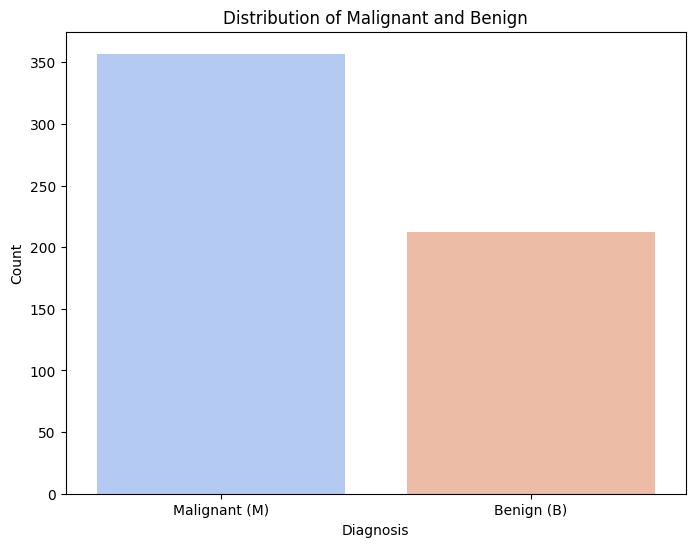

In [11]:
# Visualize the distribution of Malignant ('M') and Benign ('B') cases
counts = breast_df['diagnosis'].value_counts()

plt.figure(figsize=(8, 6), facecolor='white')
sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
plt.title('Distribution of Malignant and Benign')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant (M)', 'Benign (B)'])
plt.show()

<ipython-input-12-556e89ccbc29>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-12-556e89ccbc29>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Map')

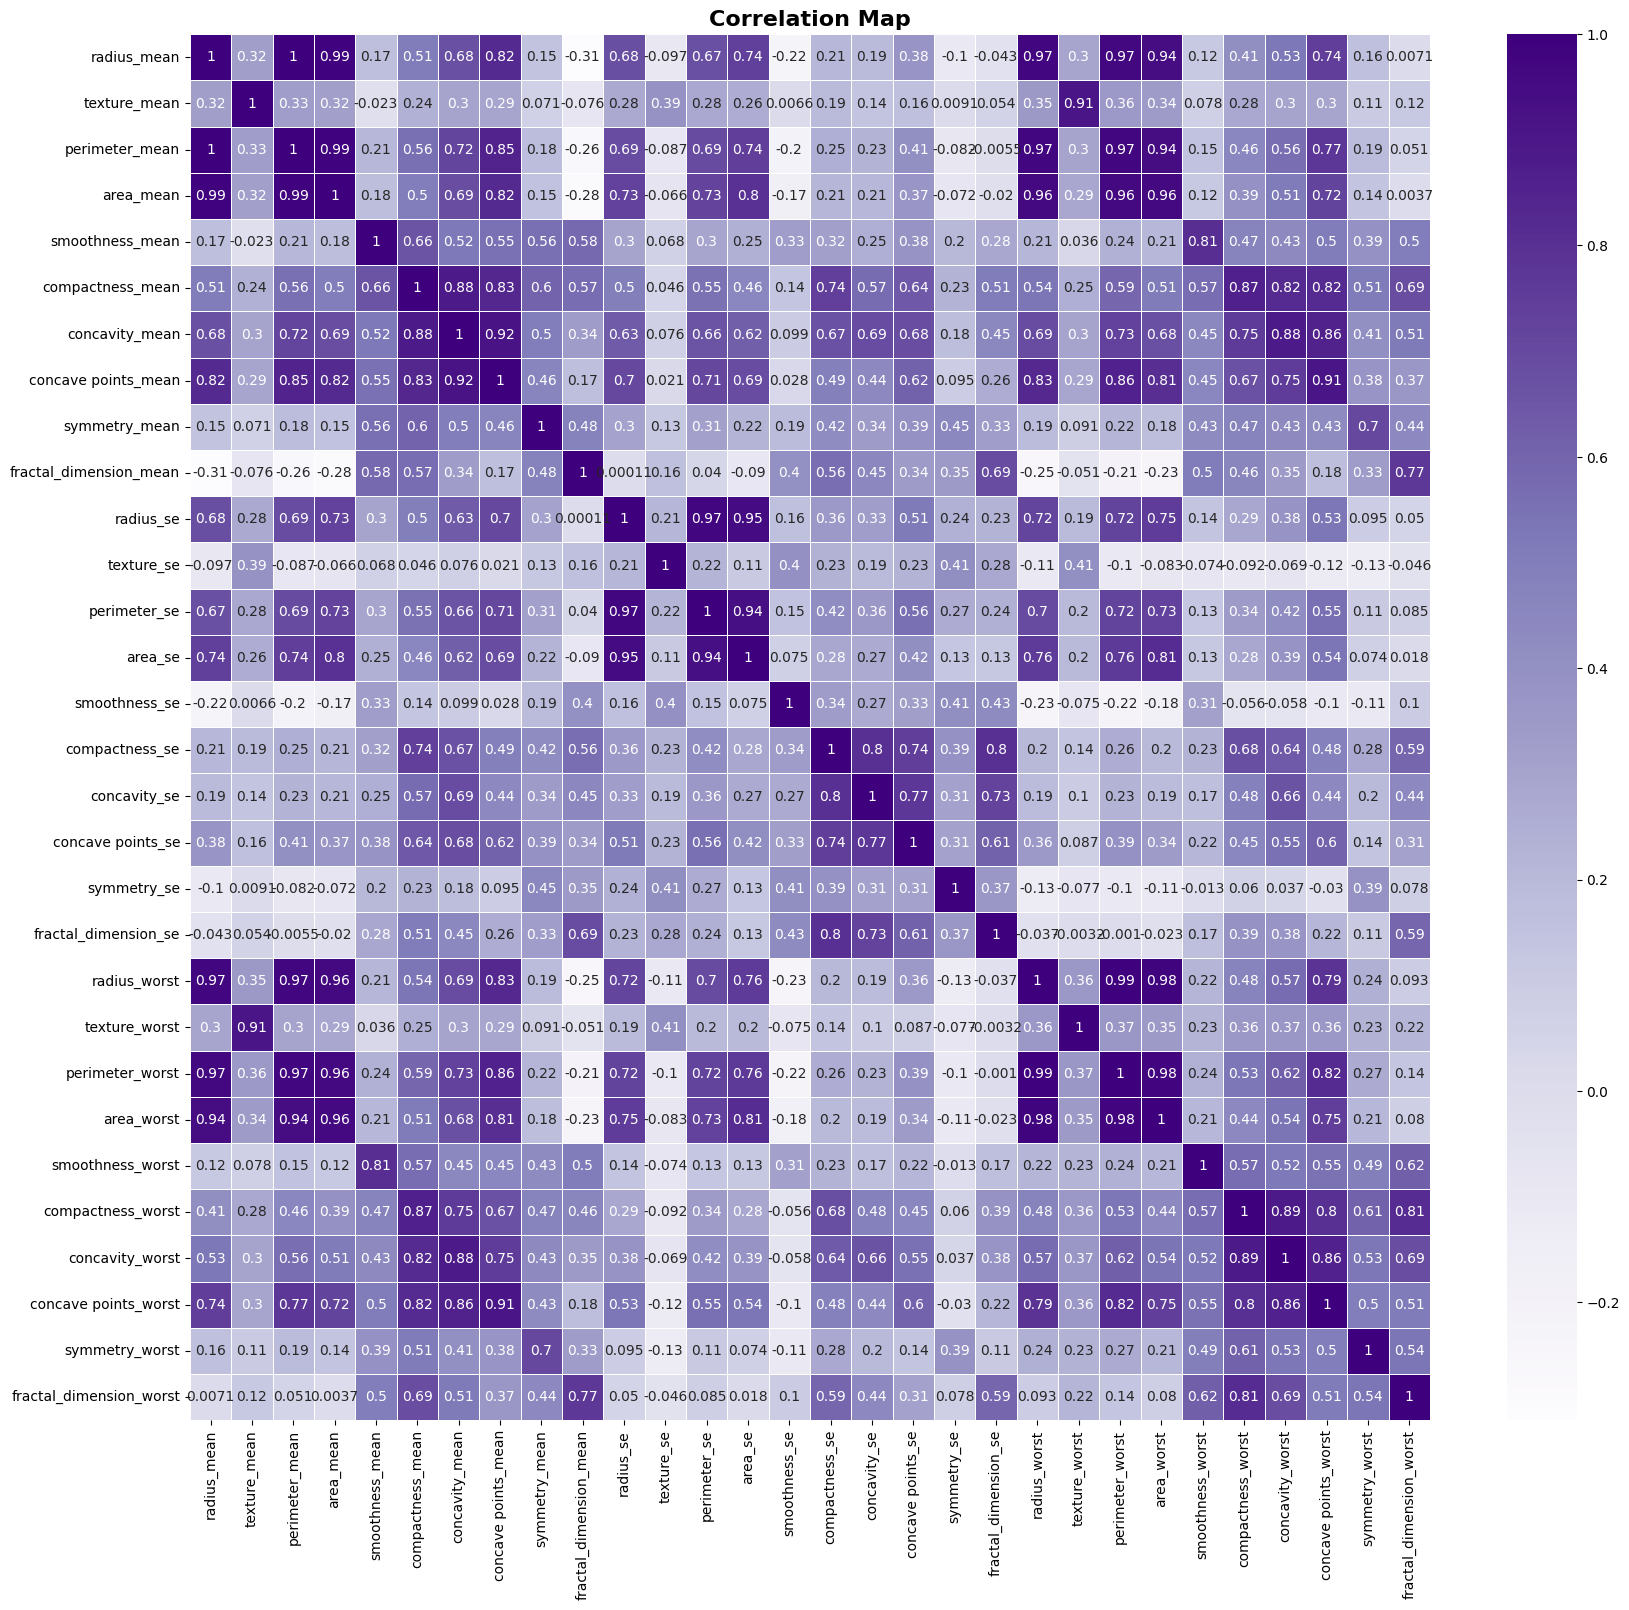

In [12]:
corr= breast_df.corr()
plt.figure(figsize= (20,18))
sns.heatmap(breast_df.corr(), annot=True, linewidth= 0.5, cmap= "Purples")
plt.title("Correlation Map", fontweight = "bold", fontsize= 16)

In [13]:
# Mean columns with diagnosis
mean_col= ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# se columns with diagnosis
se_col= ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

# worst columns with diagnosis
worst_col= ['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

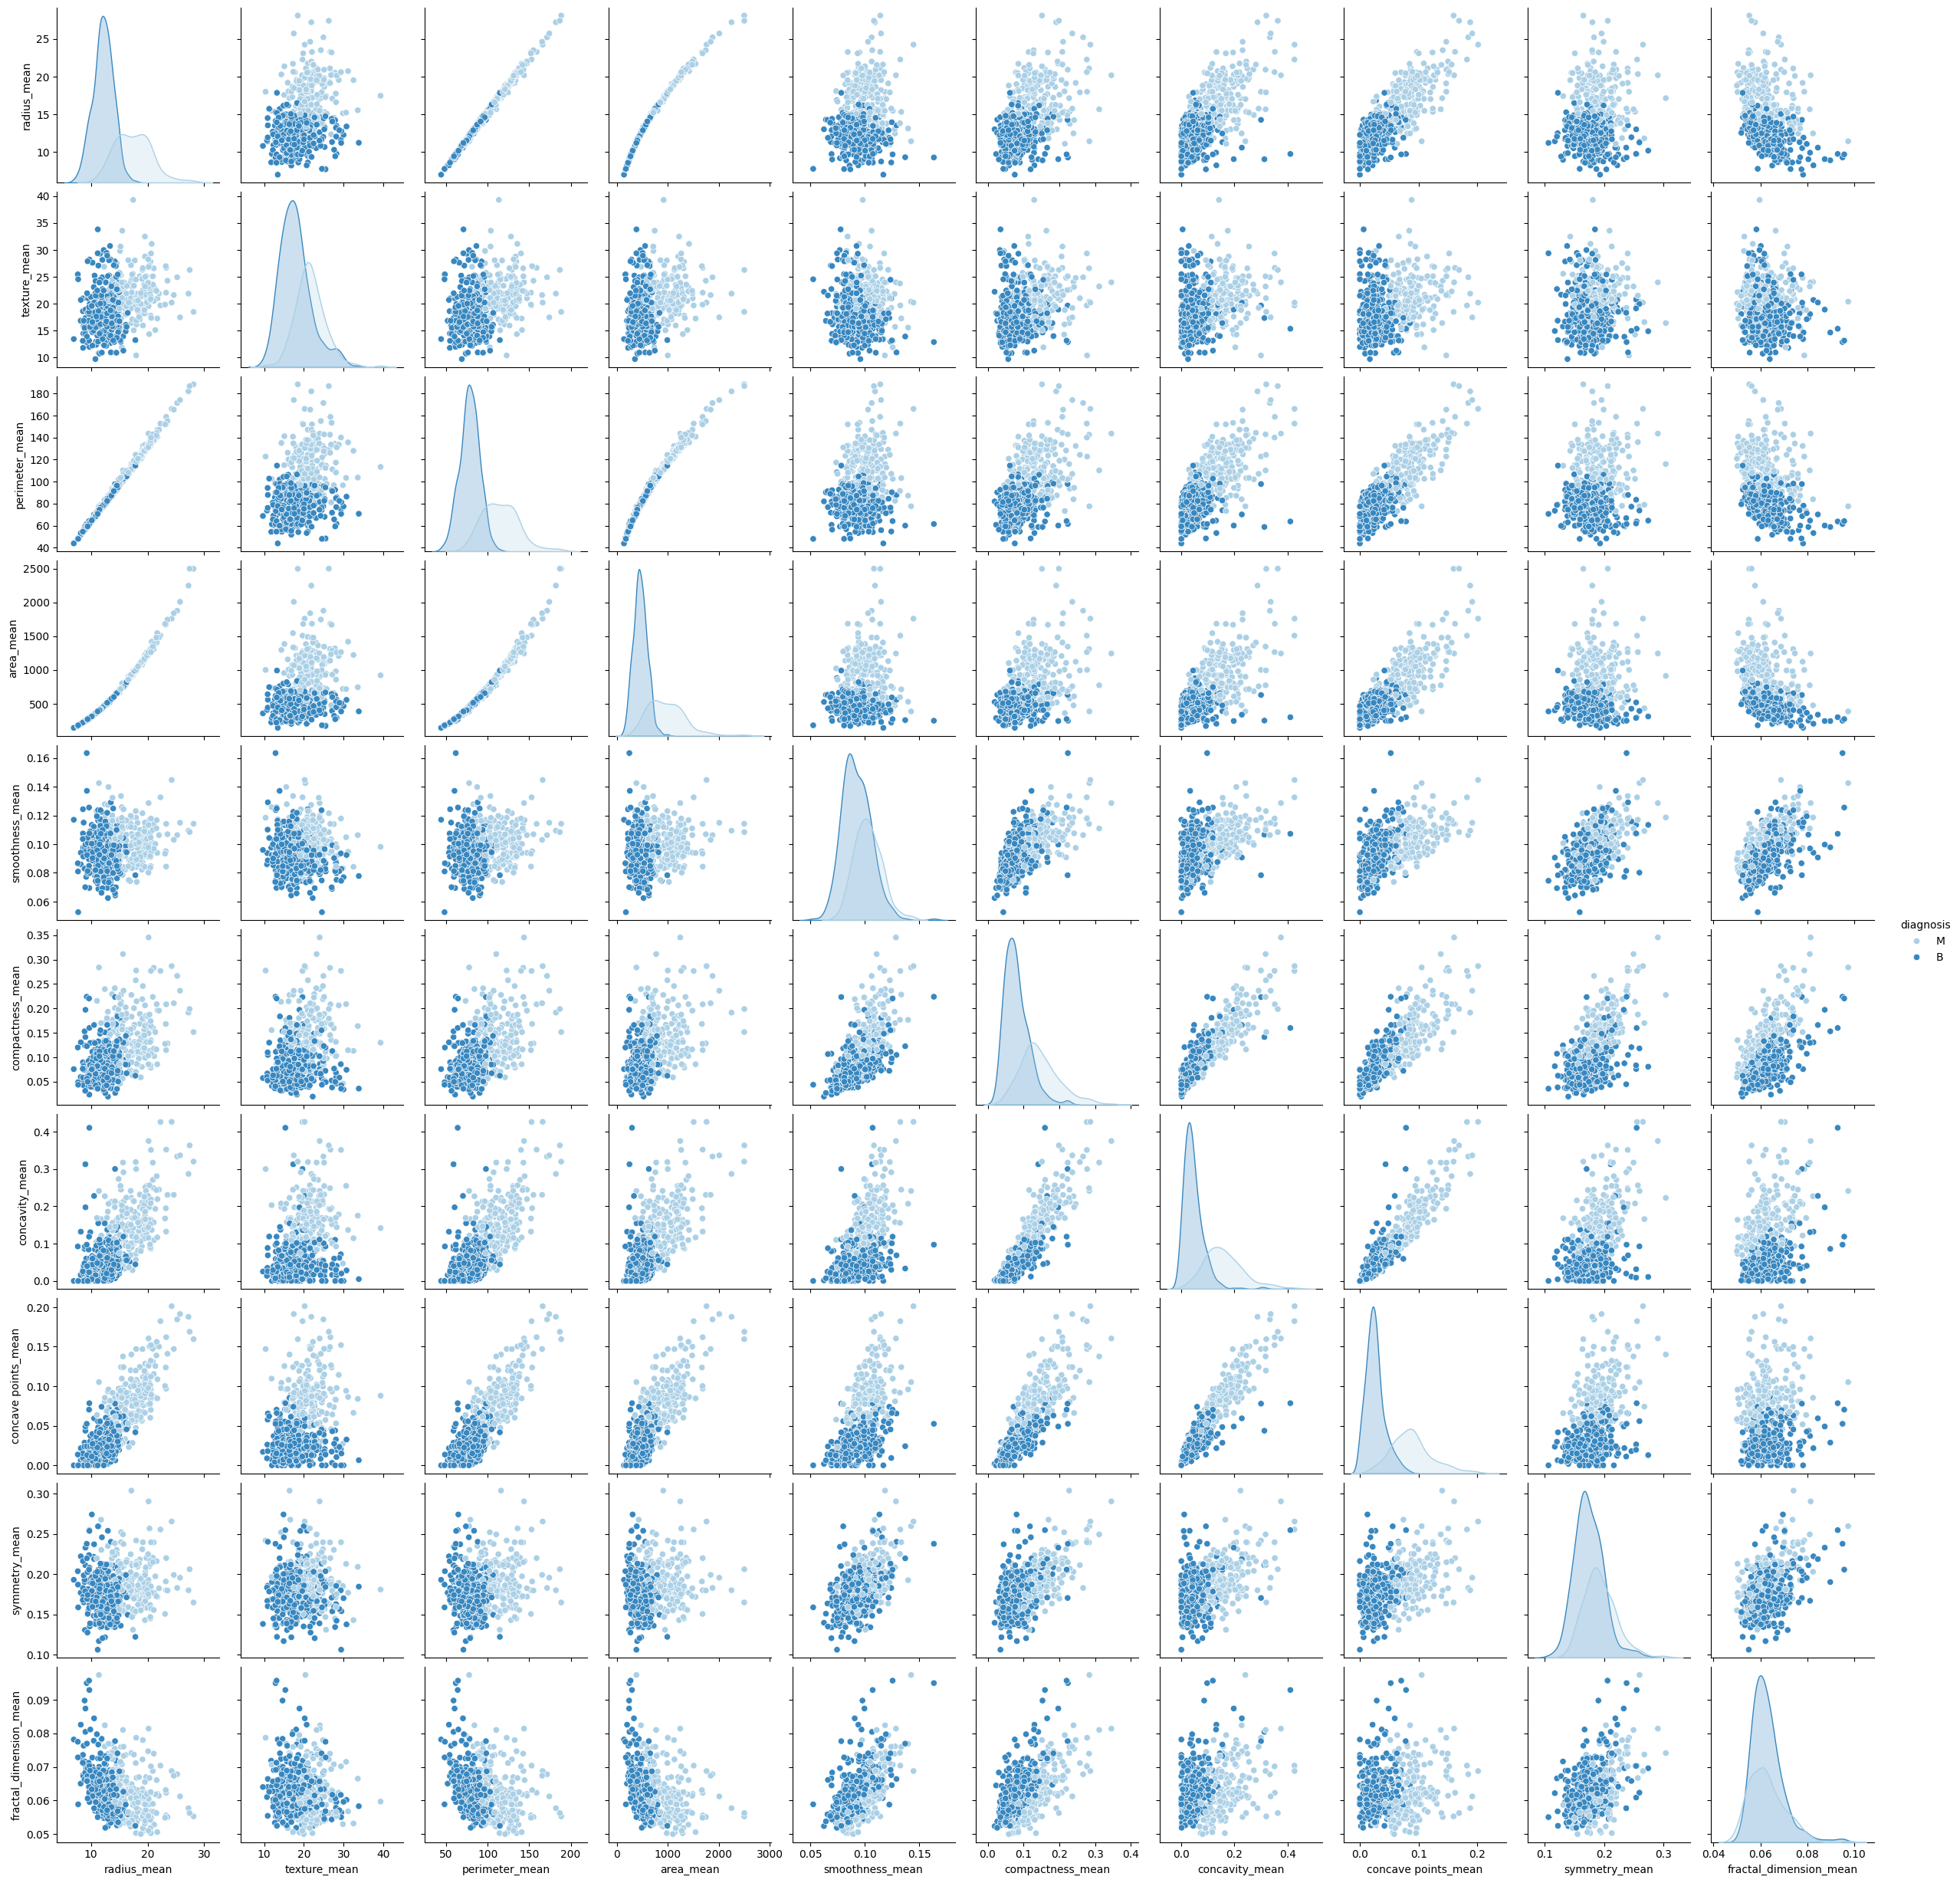

In [14]:
sns.pairplot(breast_df[mean_col], hue = 'diagnosis', palette= 'Blues')

In [ ]:
sns.pairplot(breast_df[se_col], hue = 'diagnosis', palette= 'Greens')

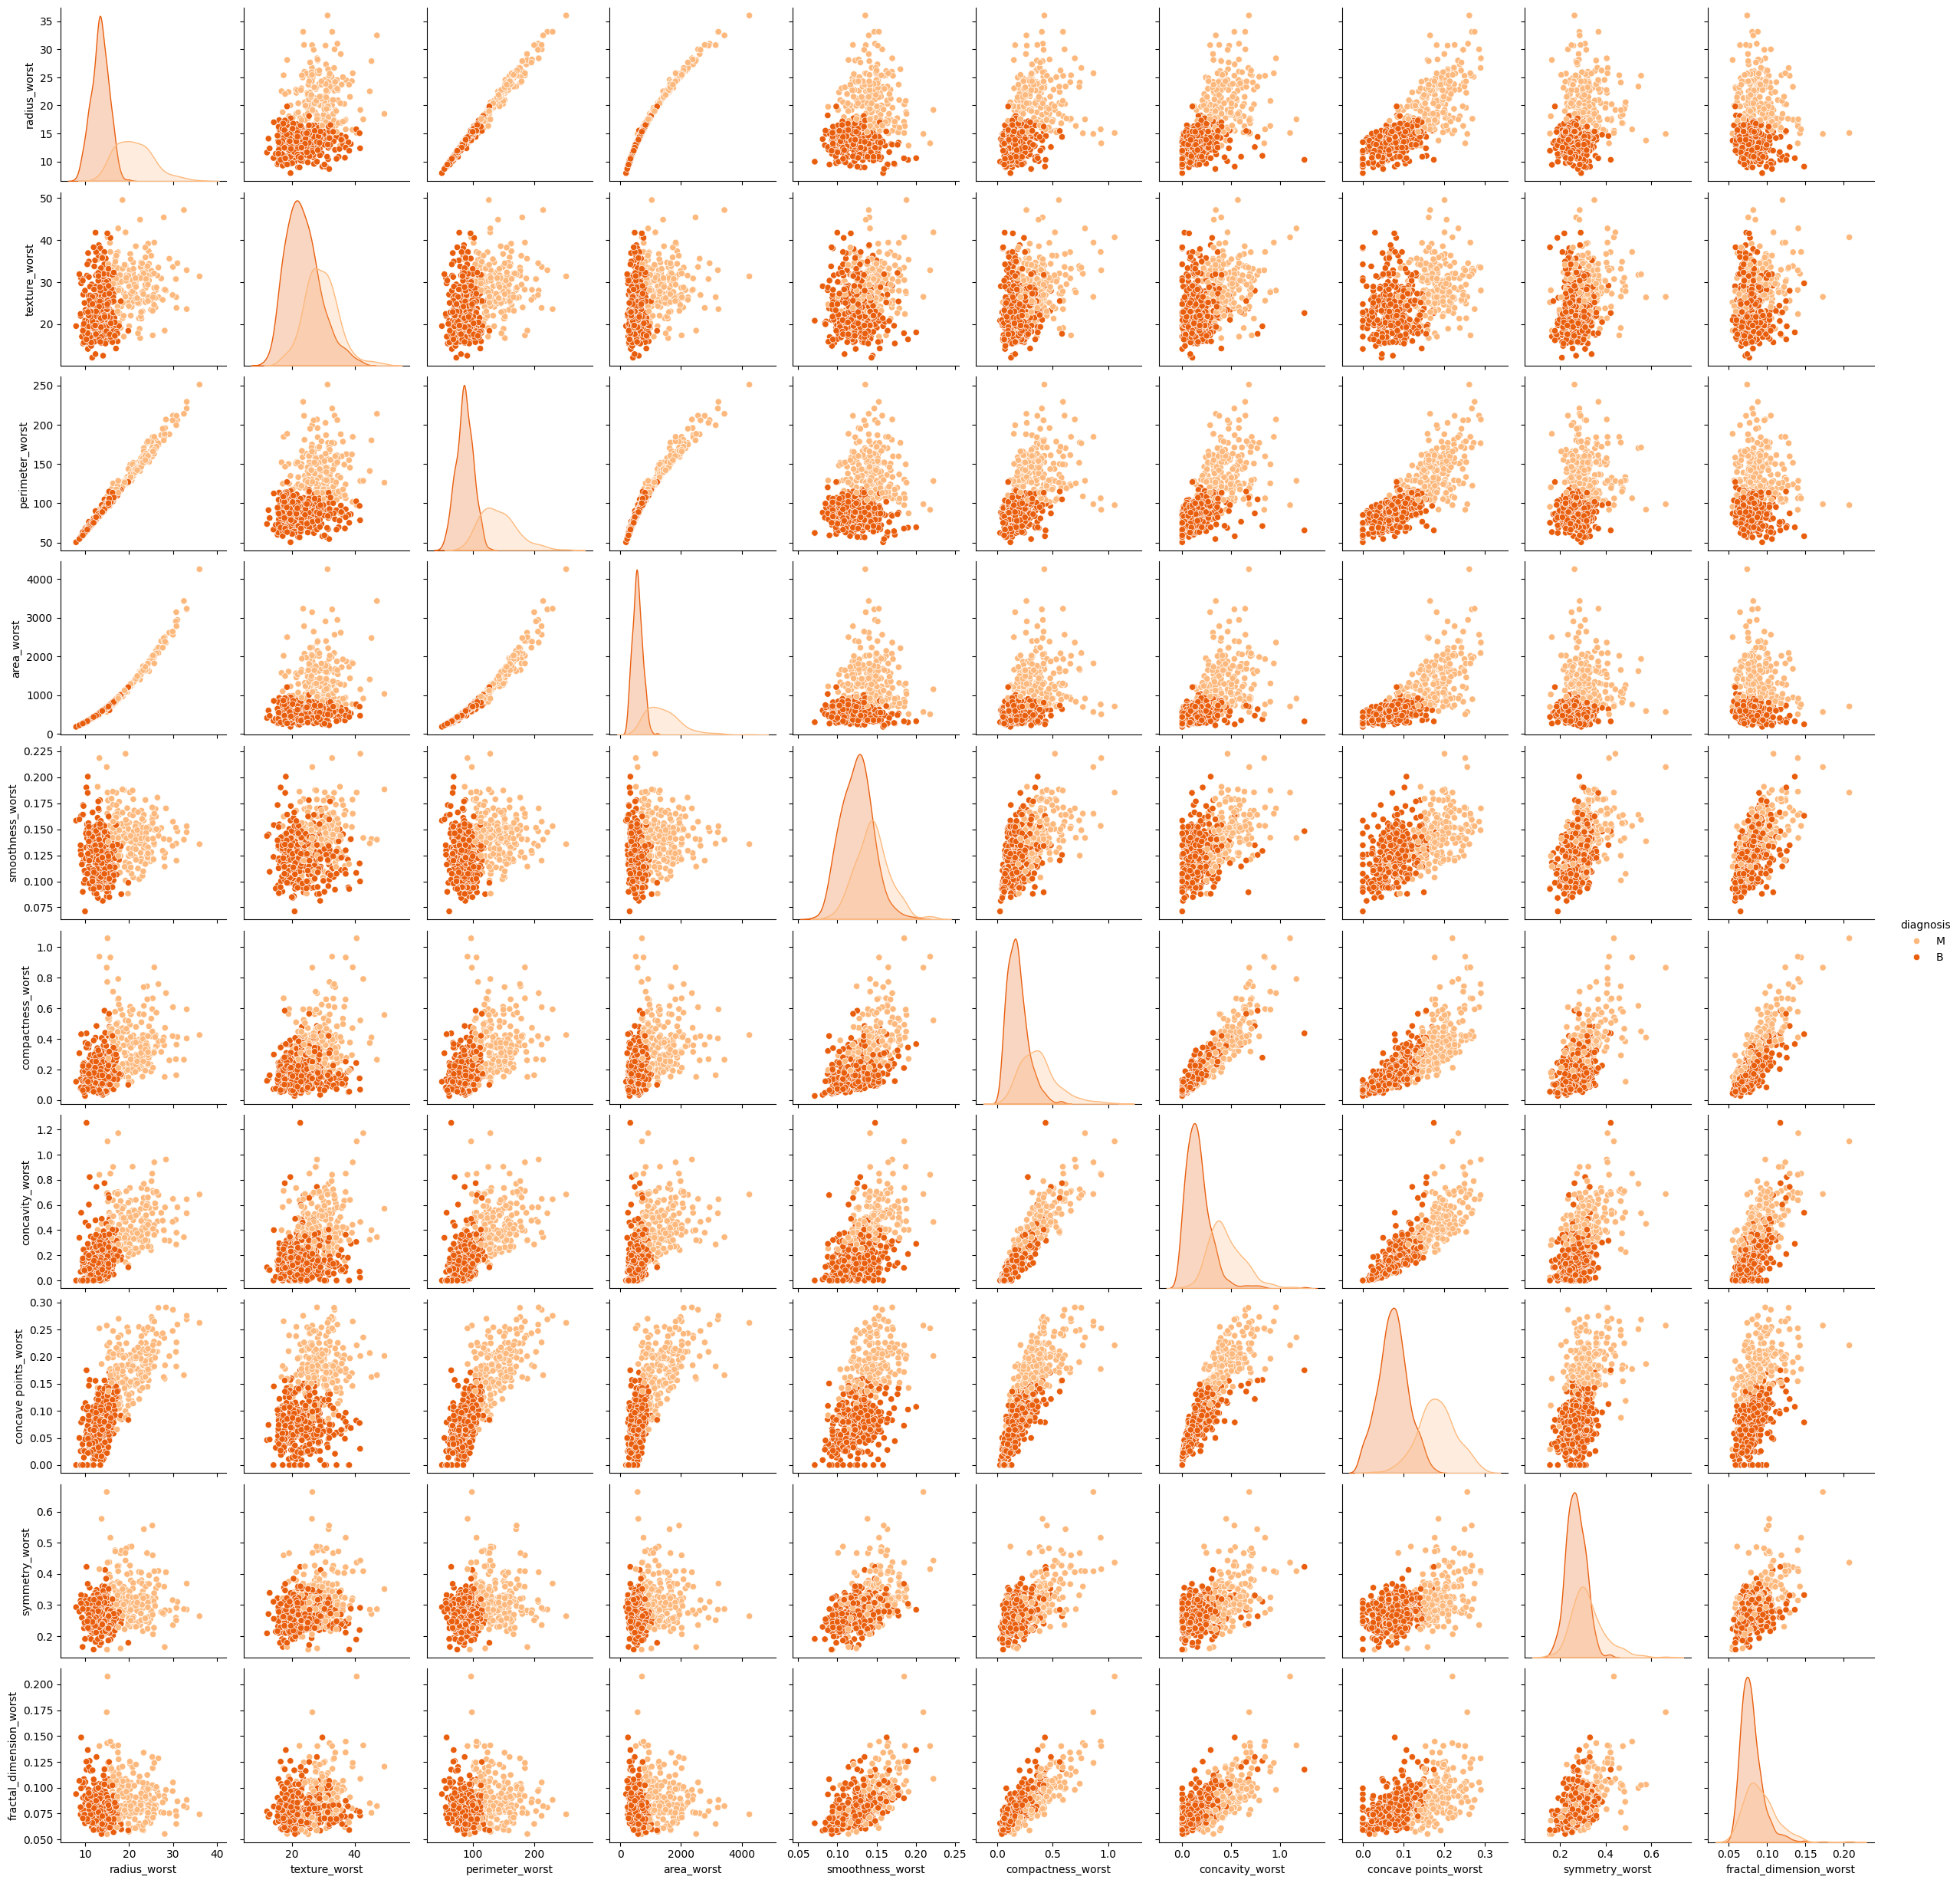

In [382]:
sns.pairplot(breast_df[worst_col], hue = 'diagnosis', palette= 'Oranges')

## 2 Building Models

### 2.1 Splitting the data into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                breast_df.drop('diagnosis', axis=1),
                breast_df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### 2.2 Classification Models


#### 2.2.1 Logistic Regression

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction1 = logreg.predict(X_test)

In [19]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction1))
print('\n')
print(classification_report(y_test, prediction1))

logreg_acc= accuracy_score(y_test, prediction1)
print("Logistic Regression model Accuracy: ", logreg_acc)

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Logistic Regression model Accuracy:  0.9824561403508771


#### 2.2.2 K Nearest Neighbours

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [21]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction2))
print('\n')
print(classification_report(y_test, prediction2))

knn_acc= accuracy_score(y_test, prediction2)
print("K Nearest Neighbours Classifier model Accuracy: ", knn_acc)

Confusion Matrix: 
 [[69  2]
 [ 3 40]]


              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

K Nearest Neighbours Classifier model Accuracy:  0.956140350877193


#### 2.2.3 Random Forest

In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)

In [23]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction3))
print('\n')
print(classification_report(y_test, prediction3))

rfc_acc= accuracy_score(y_test, prediction3)
print("Random Forest model Accuracy: ", rfc_acc)

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest model Accuracy:  0.9649122807017544


#### 2.2.4 Support Vector Machine

In [24]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
prediction4 = svc.predict(X_test)

In [25]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction4))
print('\n')
print(classification_report(y_test, prediction4))

svm_acc= accuracy_score(y_test, prediction4)
print("Support Vector Machine model Accuracy: ", svm_acc)

Confusion Matrix: 
 [[71  0]
 [ 3 40]]


              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Support Vector Machine model Accuracy:  0.9736842105263158


#### 2.2.5 Gradiant Boosting Classifier

In [26]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
prediction5 = gbc.predict(X_test)

In [27]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction5))
print('\n')
print(classification_report(y_test, prediction5))

gbc_acc= accuracy_score(y_test, prediction5)
print("Gradient Boosting Classifier model Accuracy: ", gbc_acc)

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Gradient Boosting Classifier model Accuracy:  0.9649122807017544


### 3 Accuracy Scores of all the Models

In [28]:
print("The accuracy of Logistic Regression model is: ", logreg_acc)
print("The accuracy of K Neighbors Classifiers model is: ", knn_acc)
print("The accuracy of Random Forest Classifier model is: ", rfc_acc)
print("The accuracy of Support Vector Machine model is: ", svm_acc)
print("The accuracy of Gradiant Boosting Classifier model is: ", gbc_acc)

The accuracy of Logistic Regression model is:  0.9824561403508771
The accuracy of K Neighbors Classifiers model is:  0.956140350877193
The accuracy of Random Forest Classifier model is:  0.9649122807017544
The accuracy of Support Vector Machine model is:  0.9736842105263158
The accuracy of Gradiant Boosting Classifier model is:  0.9649122807017544


#### 3.1 Visualization of all the Accuracy Scores of the Models

<ipython-input-29-d3e822dcfed8>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




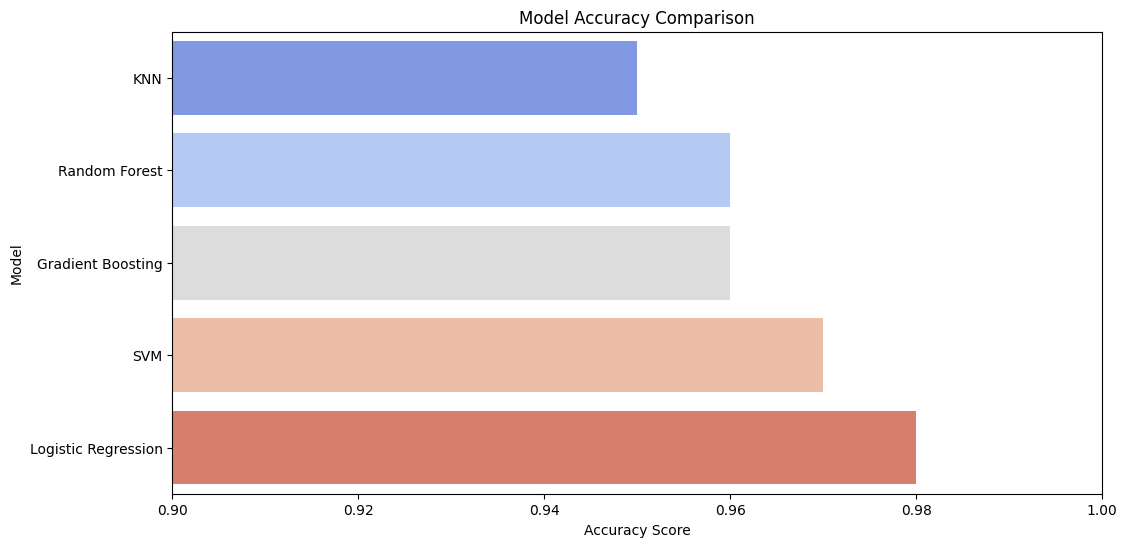

In [29]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracy_scores = [0.98, 0.95, 0.96, 0.97, 0.96]  # Example scores

df = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores})

sorted_df = df.sort_values('Accuracy Score', ascending=True)

plt.figure(figsize=(12, 6), facecolor='white')
sns.barplot(x='Accuracy Score', y='Model', data=sorted_df, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0.9, 1.0)
plt.show()